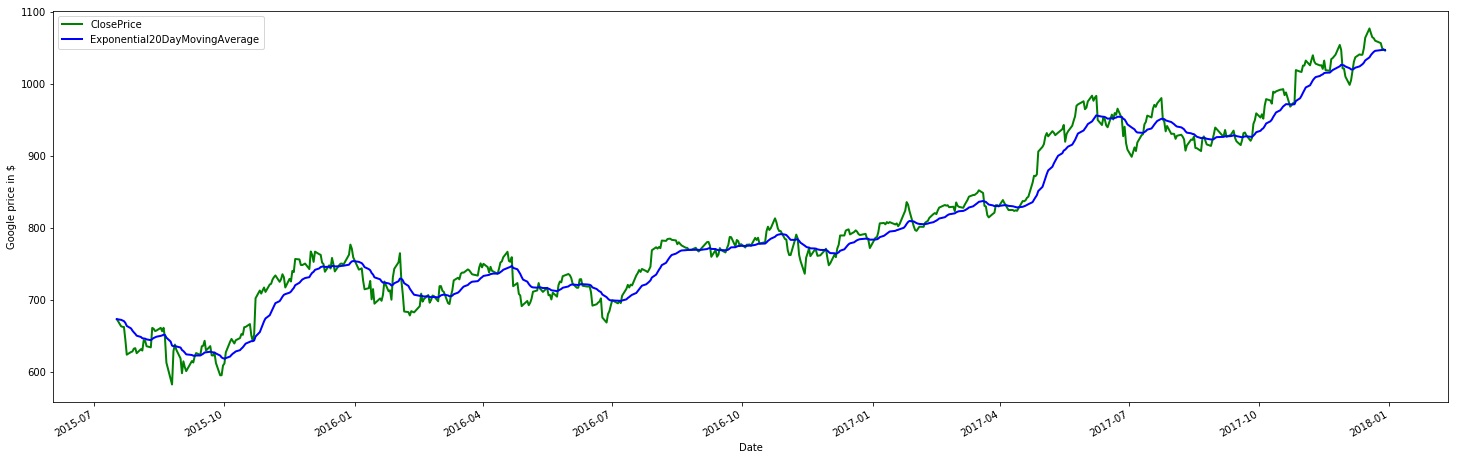

In [2]:
import pandas as pd

from pandas_datareader import data

start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME = 'goog_data.pkl'

try:
  goog_data2 = pd.read_pickle(SRC_DATA_FILENAME)
except FileNotFoundError:
  goog_data2 = data.DataReader('GOOG', 'yahoo', start_date, end_date)
  goog_data2.to_pickle(SRC_DATA_FILENAME)

goog_data = goog_data2.tail(620)

close = goog_data['Close']

'''
The Exponential Moving Average (EMA) represents
 an average of prices, but places more weight on recent prices. The
 weighting applied to the most recent price depends on the selected
 period of the moving average. The shorter the period for the EMA,
 the more weight that will be applied to the most recent price.
 
EMA = ( P - EMAp ) * K + EMAp
Where:
P = Price for the current period
EMAp = the Exponential moving Average for the previous period
K = the smoothing constant, equal to 2 / (n + 1)
n = the number of periods in a simple moving average roughly approximated by the EMA
'''
num_periods = 20 # number of days over which to average
K = 2 / (num_periods + 1) # smoothing constant
ema_p = 0

ema_values = [] # to hold computed EMA values
for close_price in close:
  if (ema_p == 0): # first observation, EMA = current-price
    ema_p = close_price
  else:
    ema_p = (close_price - ema_p) * K + ema_p

  ema_values.append(ema_p)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.show()